In [6]:
# Copyright (c) 2013, Robin Wilson
# All rights reserved.
#
# Redistribution and use in source and binary forms, with or without
# modification, are permitted provided that the following conditions are met:
#     * Redistributions of source code must retain the above copyright
#       notice, this list of conditions and the following disclaimer.
#     * Redistributions in binary form must reproduce the above copyright
#       notice, this list of conditions and the following disclaimer in the
#       documentation and/or other materials provided with the distribution.
#     * Neither the name of Robin Wilson nor the
#       names of its contributors may be used to endorse or promote products
#       derived from this software without specific prior written permission.
#
# THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND
# ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED
# WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE
# DISCLAIMED. IN NO EVENT SHALL <COPYRIGHT HOLDER> BE LIABLE FOR ANY
# DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES
# (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES;
# LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND
# ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT
# (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS
# SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.
from scipy.odr import Model, Data, ODR
from scipy.stats import linregress
import numpy as np
import matplotlib.pyplot as plt

def orthoregress(x, y):
    """Perform an Orthogonal Distance Regression on the given data,
    using the same interface as the standard scipy.stats.linregress function.

    Arguments:
    x: x data
    y: y data

    Returns:
    [m, c, nan, nan, nan]

    Uses standard ordinary least squares to estimate the starting parameters
    then uses the scipy.odr interface to the ODRPACK Fortran code to do the
    orthogonal distance calculations.
    """
    linreg = linregress(x, y)
    mod = Model(f)
    dat = Data(x, y)
    od = ODR(dat, mod, beta0=linreg[0:2])
    out = od.run()

    return list(out.beta) + [np.nan, np.nan, np.nan]


def f(p, x):
    """Basic linear regression 'model' for use with ODR"""
    return (p[0] * x) + p[1]

In [3]:
orthoregress([1,3,4,5],[3,4,5,3])

[0.19997298251549156, 3.100087815933789, nan, nan, nan]

In [19]:
n_points = 10
x = np.random.uniform(low=-10, high=10, size=n_points)
y = np.random.uniform(low=-10, high=10, size=n_points)
print(x)
print(y)

[ 2.90823955  1.74261566 -9.12309427  4.0636778   3.46492255  1.04191638
 -6.44360842 -9.66970404  3.3753537   0.39256995]
[-0.58356003  1.20694237 -7.21893722  5.84958804  2.7749313   6.69045184
  7.33753229 -7.78146211  1.25729658 -4.80589256]


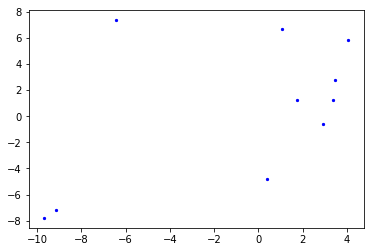

In [20]:
plt.scatter(x, y, s=5, color='blue')
# for i in range(n_lines):
#     plt.plot(X[:, 0], np.dot(X, coefs_ransac[i]), linewidth=2, color='red')
plt.show()

In [21]:
val = orthoregress(x,y)

In [24]:
y_pred = val[0]*x + val[1]

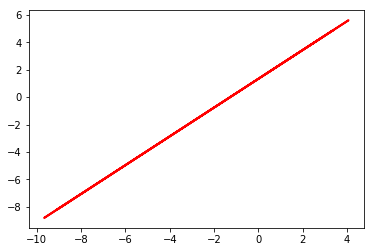

In [23]:
plt.plot(x, y_pred, linewidth=2, color='red')
